# 3.5.1 - Reducción de la Dimensionalidad: Análisis de Componentes Principales (PCA)


* En este Notebook vamos a ver en que consiste la reducción de la dimensionalidad de los datos usando la técnica del ***PCA: Principal Component Analysis (Análisis de Componentes Principales)*** y como se realiza esta reducción con la técnica matemática del SVD: Singula Value Descomposition.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Reducción de la Dimensionalidad](#M1)
<span></span><br>
    2. [SVD: Singular Value Descomposition](#M2)
<span></span><br>
    3. [PCA: Analisis de Componentes Principales](#M3)
<span></span><br>
    4. [Bonus Track - SVD: Cálculo Analítico ](#M4)


<hr>


# <a name="M1">1. Reducción de la Dimensionalidad</a>


* Cuando se recoge una ***muestra de datos*** los más frecuente es ***tomar el mayor número posible de variables***.


* Cuando se toman ***demasiadas variables, puede que haya variables que estén relacionadas entre sí*** o que midan lo mismo bajo distintos puntos de vista.


* Por tanto se puede llegar a tener la ***necesidad de reducir el número de variables***, sin perder (o minimizando la perdida de) la información aportada por esas variables.


* El objetivo de las ***técnicas de reducción de la dimensionalidad son la de obtener unas nuevas variables "latentes" que sean combinaciones lineales de las anteriores variables***, construyéndose estas nuevas variables latentes en ***orden de importancia***.


* En resumen; el objetivo de estas técnicas, son las de ***generar un nuevo Dataset con un número inferior de varibles (variables latentes) respecto al Dataset original***, minimizando la perdida de información de los datos. 


* En la siguiente imagen podemos ver cual es el objetivo de estas técnicas de reducción de la dimensionalidad:

<img src="../../imgs/3_05_01_01_pca.png" style="width: 500px;"/>

* Veamos a continuación como conseguir esa redución de la dimensionalidad con la técnica matemática del SVD:


<hr>


# <a name="M2">2. SVD: Singular Value Descomposition</a>


* La técnica del ***SVD descompone una matriz 'A' en 3 matrices 'U', 'V' y 'S'***:
<span></span><br><br>
    + ***U***: Contiene los valores de los factores latentes de las observaciones.
<span></span><br><br>
    + ***V***: Contiene los valores de los factores latentes de las variables.
<span></span><br><br>
    + ***S***: Es una matriz cuya diagonal contiene los llamados ***"valores singulares"*** que son decrecientes y no negativos. Estos ***valores singulares representan la importancia que tienen cada uno de los factores latentes***.


* La descomposición quedaría de la siguiente forma:


<img src="../../imgs/3_05_01_02_pca.png" style="width: 700px;"/>


* El SVD tiene una propiedad muy importante dada por el ***teorema de Eckart-Young que afirma que la mejor aproximación a la matriz 'A' la obtenemos al poner a ceros los ‘n’ valores singulares de menor a mayor valor***; es decir, reduciendo la matriz S


* De esta manera podemos ***obtener una aproximación de la matriz original 'A', multiplicando las matrices U<sub>k</sub> x S<sub>k</sub> x V<sub>k</sub>***.


<img src="../../imgs/3_05_01_03_pca.png" style="width: 700px;"/>


* Veamos a continuación un ejemplo del SVD, de como obtener las Matrices 'U', 'V' y 'S' a partir de una Matriz 'A' y como reduciendo el número de valores singulares obtenemos una matriz similar a la matriz original 'A':


<img src="../../imgs/3_05_01_06_pca.png" style="width: 900px;"/>


* A continuación mostramos como resolverlo de manera programática:

In [1]:
import numpy as np
np.set_printoptions(precision=2) # Por legibilidad pongo las matrices con dos decimales

A = np.array([[3, 6, 1, 6, 2],
              [9, 1, 11, 3, 21],
              [1, 2, 3, 7, 2], 
              [2, 9, 2, 4, 6],
              [3, 2, 1, 2, 7],
              [9, 3, 2, 5, 6]])

# Calculo el SVD
u,s,v_t = np.linalg.svd(A)

print('Matriz U:\n{u}\n'.format(u=u))
print('Valores Singulares (Matriz):\n{s}\n'.format(s=np.diag(s)))
print('Matriz V (Traspuesta):\n{v}\n'.format(v=v_t))

Matriz U:
[[-0.2   0.56  0.05  0.04  0.08 -0.8 ]
 [-0.81 -0.51 -0.1   0.16  0.19 -0.14]
 [-0.17  0.34  0.22  0.82 -0.17  0.32]
 [-0.3   0.5  -0.66 -0.21  0.18  0.39]
 [-0.26  0.01 -0.09 -0.22 -0.94 -0.04]
 [-0.36  0.25  0.71 -0.46  0.12  0.29]]

Valores Singulares (Matriz):
[[30.7   0.    0.    0.    0.  ]
 [ 0.   12.6   0.    0.    0.  ]
 [ 0.    0.    6.16  0.    0.  ]
 [ 0.    0.    0.    5.15  0.  ]
 [ 0.    0.    0.    0.    1.86]]

Matriz V (Traspuesta):
[[-0.41 -0.22 -0.36 -0.27 -0.76]
 [ 0.05  0.7  -0.2   0.59 -0.34]
 [ 0.69 -0.54 -0.07  0.37 -0.32]
 [-0.54 -0.32  0.53  0.57 -0.07]
 [ 0.26  0.27  0.74 -0.35 -0.44]]



## - Varianza Acumulada: Reducción de Variables


* ***La matriz 'S' es una matriz diagonal que contiene los valores singulares (de forma decrecientes) en el que cada valor singular nos indica el "peso" que tiene cada variable latente.***


* Dicho de otra manera: ***los valores singulares nos indican la cantidad de información que nos aporta cada variable latente***.


* Si calculamos la suma acumulada de los valores singulares y calculamos el porcentaje que este supone respecto del total, podemos obtener el porcentaje de información que obtendríamos si nos quedasemos con 'k' valores singulares.


* A esta valor de porcentaje de información se conoce como ***Varianza Acumulada***.


* Veamos a continuación, la varianza acumulada por número de valores singulares del ejemplo anterior:

['0.5435', '0.7666', '0.8758', '0.9670', '1.0000']


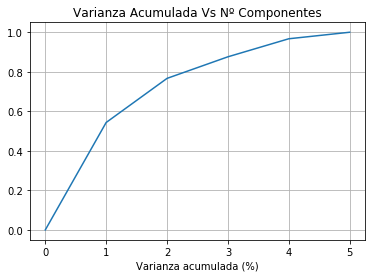

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

varianza_acumulada = np.cumsum(s)/np.sum(s)
print(['{:.4f}'.format(i) for i in varianza_acumulada])

# Dibujamos la varianza acumulada
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.insert(varianza_acumulada, 0, 0))
ax.set_xlabel('Número de componentes')
ax.set_xlabel('Varianza acumulada (%)')
ax.set_title('Varianza Acumulada Vs Nº Componentes')
ax.grid()
plt.show()

* Cada uno de estos valores nos indica el porcentaje de información que obtenemos respecto de la matriz original 'A' si cogiendo 'k' valores singulares:

|Num Valores Singulares|Varianza Acumulada (%)|
|---|---|
|1|54,4|
|2|76,7|
|3|87,6|
|4|96,7|
|5|100|


* Cuando aplicamos esta técnicas de ***reducción de la dimensionalidad, hay que buscar un compromiso entre la información que perdemos al seleccionar 'k' variables latentes*** (también llamadas componentes) ***y la reducción de variables con las que vamos a trabajar*** (reduciendo los tiempos de ejecución). 


* Si en el ejemplo que estamos realizando seleccionamos 3 valores singulares (o 3 componentes) nos quedaremos con el 87,6 % de la información del Dataset (Matriz A) reduciendo en 2 variables el Dataset inicial:


<img src="../../imgs/3_05_01_04_pca.png" style="width: 800px;"/>


* Veamos como hacemos estos cálculos:

In [3]:
u_3 = u[:,0:3]
s_3 = np.diag(s[0:3])
v_3 = v_t[0:3:,]
print('Matriz Uk:\n{u}\n'.format(u=u_3))
print('Valores Singulares (Matriz):\n{s}\n'.format(s=s_3))
print('Matriz Vk (Traspuesta):\n{v}\n'.format(v=v_3))

Matriz Uk:
[[-0.2   0.56  0.05]
 [-0.81 -0.51 -0.1 ]
 [-0.17  0.34  0.22]
 [-0.3   0.5  -0.66]
 [-0.26  0.01 -0.09]
 [-0.36  0.25  0.71]]

Valores Singulares (Matriz):
[[30.7   0.    0.  ]
 [ 0.   12.6   0.  ]
 [ 0.    0.    6.16]]

Matriz Vk (Traspuesta):
[[-0.41 -0.22 -0.36 -0.27 -0.76]
 [ 0.05  0.7  -0.2   0.59 -0.34]
 [ 0.69 -0.54 -0.07  0.37 -0.32]]



* Haciendo la multiplicación de las tres matrices reducidas obtenemos una nueva matriz que es muy similar a la matriz original:

In [4]:
A_prima = u_3.dot(s_3).dot(v_3)
print('Matriz "Latente":\n{A_prima}'.format(A_prima=A_prima))
print('\n\nMatriz Original:\n{A}'.format(A=A))

Matriz "Latente":
[[ 3.08  6.03  0.77  5.93  2.08]
 [ 9.36  1.18 10.29  2.65 21.22]
 [ 3.35  3.45  0.99  4.5   2.17]
 [ 1.32  8.55  2.33  4.75  6.07]
 [ 2.86  2.11  2.88  2.02  6.14]
 [ 7.68  2.18  3.08  6.41  5.93]]


Matriz Original:
[[ 3  6  1  6  2]
 [ 9  1 11  3 21]
 [ 1  2  3  7  2]
 [ 2  9  2  4  6]
 [ 3  2  1  2  7]
 [ 9  3  2  5  6]]


<hr>


# <a name="M3">3. PCA: Analisis de Componentes Principales</a>


* ***El Análisis de Componentes Principales (PCA) es un método que nos permite obtener unas nuevas variables (latentes) que sean combinaciones lineales de las variables originales y que están correlacionadas entre sí***.


* El objetivo de esta técnica no es otro que ***obtener un nuevo Dataset más reducido con variables latentes*** (llamadas también componentes) cuyo ***número de variables latentes sea inferior al número de variables del Dataset original***.


* Las técnicas de reducción de la dimensionalidad y en particular el PCA tiene las siguientes ventajas e inconvenientes: 
<span></span><br><br>
    + ***Ventajas***: Reducir la dimensionalidad de los datos; es decir, trabajar con menos datos, lo que supone reducir los tiempos de computo.
<span></span><br><br>    
    + ***Inconvenientes***: Al reducir la dimensionalidad perdemos información en los datos.
    
    
* Utilizar este tipo de técnicas es muy conveniente cuando trabajamos con Dataset con un número relevante de variables y queremos reducir el tamaño del Dataset para utilizarlo con algún algoritmo de aprendizaje; por tanto, ***hay que buscar un compromiso entre la reducción del número de variables que nos reducirán el tiempo de computo y la perdida de información que nos supone la reducción de variables.***


* Este ***compromiso entre la reducción de la dimensionalidad y la perdida de información*** lo podemos valorar con el estudio de la ***varianza acumulada*** vista anteriormente.


## - PCA


* ***El Análisis de Componentes Principales (PCA) es un método que se basa en la técnica matemática del SVD*** para obtener a partir de un Dataset con 'm' variables, un nuevo Dataset con 'k' variables latentes (siendo k<m).


* Este ***nuevo Dataset de variables latentes*** lo conseguimos aplicando el SVD al Dataset y ***multiplicando las matrices $U_k \cdot S_k$,*** eligiendo un valor apropiado de 'k' (o de componentes).


* Veamos en la siguiente imagen la obtención del nuevo Dataset:


<img src="../../imgs/3_05_01_05_pca.png" style="width: 700px;"/>


* La explicación de porqué el nuevo Dataset de variables latentes lo obtenemos multiplicando estas dos matrices es porque la matriz 'U' contiene el valor de las variables latentes de las observaciones y 'S' la importancia de las variables latentes; por lo que multiplicando las dos matrices, tenemos el valor de las variables latentes con su 'importancia' en terminos absolutos.


## - PCA con Scikit


* Para resolver un problema de reducción de la dimensionalidad con PCA vamos a utilizar la clase ***"PCA()"***, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


* La clase ***"PCA(n_components)"*** recibe como parámetro el ***número de componentes (o de variables latentes)*** que queramos que tenga nuestro nuevo Dataset y llamando al método ***".fit(A)"*** (pasandole el Dataset original 'A') ajusta el modelo.


* Para ***obtener el nuevo Dataset reducido de variables latentes*** con el resultado de multiplicar las matrices $U_k \cdot S_k$ del SVD, siendo 'k' el número de componentes indicado, tenemos que llamar al método ***".transform(A)"***.


* Para ***obtener los valores singulares*** lo hacemos llamando al atributo de la clase ***".singular_values_"***.


* En el caso de que queramos ***obtener la matriz $V^{t}_{k}$*** lo hacemos llamando al atributo de la clase ***".components_"***.


* Veamos a continuación como obtener el Dataset reducido aplicando el PCA, trabajando con la siguiente matriz de ejemplo:

In [5]:
A = np.array([[3, 6, 1, 6, 2],
              [9, 1, 11, 3, 21],
              [1, 2, 3, 7, 2], 
              [2, 9, 2, 4, 6],
              [3, 2, 1, 2, 7],
              [9, 3, 2, 5, 6]])

* Creamos un objeto de la clase PCA pasandole el número de componentes y ajustamos el modelo con el método ***".fit(A)"*** pasandole el Dataset A:

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(A)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

* Obtenemos el Dataset reducido de variables latentes llamando al método ***".transform(A)"***:


* ***NOTA:*** llamando al método ***".fit_transform(A)"*** nos ajusta el modelo y nos devuelve el Dataset reducido de variables latentes.

In [7]:
pca.transform(A)

array([[-6.42,  0.45,  0.68],
       [16.58,  0.41, -0.79],
       [-5.6 , -2.07, -3.54],
       [-3.33,  4.99,  0.86],
       [-1.08, -0.56, -0.99],
       [-0.15, -3.22,  3.77]])

* Para obtener los valores singulares lo hacemos llamando al atributo de la clase ***".singular_values_"***.

In [8]:
pca.singular_values_

array([18.96,  6.34,  5.44])

* En el caso de que queramos obtener la matriz $V^{t}_{k}$ lo hacemos llamando al atributo de la clase ***".components_"***.

In [9]:
pca.components_

array([[ 0.31, -0.18,  0.42, -0.12,  0.82],
       [-0.44,  0.82,  0.04, -0.19,  0.3 ],
       [ 0.82,  0.45, -0.35, -0.09, -0.05]])

## - Estudio de la Varianza Acumulada


* Una de las tareas importantes que debemos de hacer cuando realizamos un ejercicio de reducción de dimensionalidad es la de buscar el ***compromiso entre la reducción de la dimensionalidad y la perdida de información***.


* Esto lo hacemos estudiando los valores singulare dados por la diagonal de la matriz 'S' del SVD en el que viendo la ***varianza acumulada*** podemos ver la relación entre el número de componentes que seleccionamos y la información que perdemos.


* Para realizar este estudio, la clase ***"PCA()"*** tiene un atributo de clase llamado ***".explained_variance_ratio_"*** que nos devuelve en una lista la varianza acumulada por componente.


* Veamos a continuación como realizar el estudio de la varianza acumulada y poder tomar la decisión de cuantas componentes tomar:


In [10]:
pca = PCA()
pca.fit(A)

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(['{:.2f}'.format(i) for i in varianza_acumulada])

['0.80', '0.89', '0.96', '1.00', '1.00']


* Una vez que tenemos la lista con las varianzas acumuladas, las dibujamos en una gráfica de lineas para valorar el número de componentes a seleccionar:

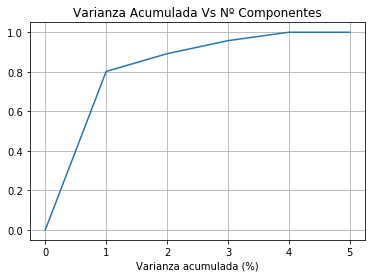

In [11]:
# Dibujamos la varianza acumulada
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.insert(varianza_acumulada, 0, 0))
ax.set_xlabel('Número de componentes')
ax.set_xlabel('Varianza acumulada (%)')
ax.set_title('Varianza Acumulada Vs Nº Componentes')
ax.grid()
plt.show()

## - IMPORTANTE: $PCA(X) = SVD(X-\overline{X_i})$


* La clase PCA de Scikit implementa la técnica matemática del SVD para obtener el Dataset reducido de variables latentes, pero para realizar este cálculo no usa la matriz con el Dataset original, si no que ***transforma el Dataset original, restandole a cada valor de la variable, el valor medio de esa variable***; es decir que $PCA(X) = SVD(X-\overline{X_i})$.


* Para obtener el resultado del SVD Scikit tiene implementada la clase ***"TruncatedSVD()"***, cuya documentación está en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html


* En el ejemplo anterior del PCA con Scikit, se puede observar como los resultados del modelo (por ejemplo con los valores singulares) no son iguales al obtenidos con el SVD de scipy y eso es porque le resta a cada valor de la variable su media.


* Veamos a continuación como haciendo ***"PCA()"*** con la matriz de ejemplo 'A' para 3 componentes, obtenemos los resultados que haciendo el "***TruncatedSVD***" con la matriz de ejemplo 'A' restandole la media de la variable a cada valor (matriz 'B') para 3 componentes, obtenemos los mismos resultados:

In [12]:
A = np.array([[3, 6, 1, 6, 2],
              [9, 1, 11, 3, 21],
              [1, 2, 3, 7, 2], 
              [2, 9, 2, 4, 6],
              [3, 2, 1, 2, 7],
              [9, 3, 2, 5, 6]])

B = np.array([[-1.50, 2.17, -2.33, 1.50, -5.33],
              [4.50, -2.83, 7.67, -1.50, 13.67],
              [-3.50, -1.83, -0.33, 2.50, -5.33],
              [-2.50, 5.17, -1.33, -0.50, -1.33],
              [-1.50, -1.83, -2.33, -2.50, -0.33],
              [4.50, -0.83, -1.33, 0.50, -1.33]])

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(A)
print("Matriz Uk·Sk:\n{}".format(pca.transform(A)))
print("\nValores Singulares:\n{}".format(pca.singular_values_))
print("\nMatriz Vk traspuesta:\n{}".format(pca.components_))

Matriz Uk·Sk:
[[-6.42  0.45  0.68]
 [16.58  0.41 -0.79]
 [-5.6  -2.07 -3.54]
 [-3.33  4.99  0.86]
 [-1.08 -0.56 -0.99]
 [-0.15 -3.22  3.77]]

Valores Singulares:
[18.96  6.34  5.44]

Matriz Vk traspuesta:
[[ 0.31 -0.18  0.42 -0.12  0.82]
 [-0.44  0.82  0.04 -0.19  0.3 ]
 [ 0.82  0.45 -0.35 -0.09 -0.05]]


In [14]:
from sklearn.decomposition import TruncatedSVD

truncated_svd = TruncatedSVD(n_components=3)
truncated_svd.fit(B)
print("Matriz Uk·Sk:\n{}".format(truncated_svd.transform(B)))
print("\nValores Singulares:\n{}".format(truncated_svd.singular_values_))
print("\nMatriz Vk traspuesta:\n{}".format(truncated_svd.components_))

Matriz Uk·Sk:
[[-6.41  0.45  0.68]
 [16.58  0.42 -0.79]
 [-5.59 -2.06 -3.54]
 [-3.32  4.99  0.86]
 [-1.08 -0.56 -0.99]
 [-0.15 -3.22  3.77]]

Valores Singulares:
[18.96  6.34  5.44]

Matriz Vk traspuesta:
[[ 0.31 -0.18  0.42 -0.12  0.82]
 [-0.44  0.82  0.04 -0.19  0.3 ]
 [ 0.82  0.45 -0.35 -0.09 -0.05]]


* Tambien podemos ver como haciendo el "***TruncatedSVD***" con la matriz de ejemplo 'A' obtenemos los resultados del SVD (como en el primer ejemplo visto con scipy):

In [15]:
truncated_svd = TruncatedSVD(n_components=3)
truncated_svd.fit(A)
print("Matriz Uk·Sk:\n{}".format(truncated_svd.transform(A)))
print("\nValores Singulares:\n{}".format(truncated_svd.singular_values_))
print("\nMatriz Vk traspuesta:\n{}".format(truncated_svd.components_))

Matriz Uk·Sk:
[[ 6.03  7.03  0.32]
 [24.71 -6.41 -0.63]
 [ 5.35  4.33  1.33]
 [ 9.14  6.31 -4.04]
 [ 7.9   0.15 -0.56]
 [10.99  3.1   4.36]]

Valores Singulares:
[30.7  12.6   6.16]

Matriz Vk traspuesta:
[[ 0.41  0.22  0.36  0.27  0.76]
 [ 0.05  0.7  -0.2   0.59 -0.34]
 [ 0.69 -0.54 -0.07  0.37 -0.32]]


<hr>


# <a name="M4">Bonus Track - SVD: Cálculo Analítico</a>


* Dada una matriz donde:
    - Las filas representan a las observaciones ('n' Observaciones o elementos)
    - Las columnas representan a las variables ('m' variables)
    
    
* Podemos descomponer esa matriz en tres matrices ***U***, ***S*** y ***V***, cuyo producto matricial es la matriz original ***A***.

$$\begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & A &  &  & \\ 
 &  &  & _{nxm} &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} =  \begin{bmatrix}
 &  &  &  & \\ 
 &  &  &  & \\ 
 &  & U &  & \\ 
 &  & _{nxn} &  & \\ 
 &  &  &  & 
\end{bmatrix} \cdot \begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & S &  &  & \\ 
 &  &  & _{nxm} &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} \cdot \begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & V^{t} &  &  & \\ 
 &  &  & _{mxm} &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} $$


* Cada una de estas matrices va a contener la siguiente información:

    * ***Matriz U***: Contiene los valores de los ***factores latentes de las observaciones***.
    * ***Matriz V***: Contiene los valores de los ***factores latentes de las variables***.
    * ***Matriz S***: Matriz en cuya diagonal estan los llamados ***Valores singulares*** que tienen que ser valores decrecientes y no negativos. Los valores de la diagonal representan la importancia que tienen cada uno de los factores latentes sobre las observaciones y las variables.

<hr>


# Cálculo Analítico: de las matrices U, S y V

### Cálculo de la matriz U

1. Se multiplica la matriz ***A*** por su traspuesta (***A·A <sup>T</sup>***) para obtener una matriz cuadrada de dimensión ***nxn***


2. Se calculan los autovalores de la matriz cuadrada (***A<sub>1</sub> = A·A <sup>T</sup>***) a partir de su polinómio característico:

$$det(A_{1}-\lambda I) = 0$$


3. Se calculan los autovectores asociados a cada autovalor (en orden decreciente por autovalor)


### Cálculo de la matriz S


1. Obtenidos los autovalores tras el cálculo de la matriz ***A***, se pone en la diagonal de la matriz ***S*** la raiz cuadrada del los autovalores en orden decreciente. El resto de elementos de la matriz ***S*** tendrán valor ***0***


### Cálculo de la matriz V

1. Se multiplica ***A <sup>T</sup>·A*** para obtener una matriz cuadrada de dimensión ***mxm***


2. Se calculan los autovectores asociados a cada autovalor (ya calculados) en orden descendente.

$$det(A_{2}-\lambda I) = 0$$

<hr>

## Ejemplo:


* Supongamos que tenemos la siguiente matriz:

$$\begin{bmatrix}
1 & 0 & 1\\ 
2 & 3 & 0
\end{bmatrix}$$

### Cálculo de la matriz U:

1. Calculamos ***A<sub>1</sub> = A·A <sup>T</sup>*** para obtener una matriz cuadrada de dimensión ***nxn***

$$A_{1} = A \cdot A' = \begin{bmatrix}
1 & 0 &1 \\ 
2 & 3 & 0
\end{bmatrix} \cdot \begin{bmatrix}
1&2 \\ 
0 & 3\\ 
1 & 0
\end{bmatrix} = \begin{bmatrix}
2 & 2\\ 
2 & 13
\end{bmatrix}$$

2. Cálculo de los autovalores de la matriz cuadrada (***A<sub>1</sub> = A·A <sup>T</sup>***) a partir de su polinómio característico:
<br><br><br>
$$det(A_{1}-\lambda I) = \begin{bmatrix}
2 - \lambda & 2\\ 
2 & 13 - \lambda
\end{bmatrix} = (2  - \lambda) \cdot (13 - \lambda) - 4 =  \lambda^{2} - 15 \lambda + 22$$

<br>

$$ \lambda = \frac{15\pm \sqrt{15^2 - 4 \cdot 1 \cdot 22}}{2\cdot1} $$
<br>
$$\lambda_{1} = 13,35 $$
<br>
$$\lambda_{2} = 1,65 $$


3. Se calculan los autovectores asociados a cada autovalor (en orden decreciente por autovalor)

  * Autovalor 1 = 13,35


$$\begin{bmatrix}
2 & 2\\ 
2 & 13
\end{bmatrix} \cdot \begin{bmatrix}
x\\y
\end{bmatrix} = 13,35 \cdot \begin{bmatrix}
x\\y
\end{bmatrix}$$

<br>

$$ \begin{matrix}
2x + 2y = 13,35x
\\ 
2x + 13y = 13,35y
\end{matrix} $$

<br>

$$ -11,35x + 2y = 0; \: si \:  x = 1; \:  y = \frac{11,35}{2} = 5,675$$

<br>

$$Normalizo \: \rightarrow \sqrt{1^2  + 5,675^2} = 5,848$$

<br>

$$Autovector (1) \: = \left [ \frac{1}{5,848} \:\: \frac{5,675}{5,848} \right ] = \left [ 0,17 \:\:\: 0,98\right ]$$

   * Para el autovalor 2 realizo los mismos pasos y obtengo el siguiente resultado:
   
$$\begin{bmatrix}
2 & 2\\ 
2 & 13
\end{bmatrix} \cdot \begin{bmatrix}
x\\y
\end{bmatrix} = 1,65 \cdot \begin{bmatrix}
x\\y
\end{bmatrix}$$ 

<br>

$$Autovector (2) \: = \left [ 0,98 \:\:\: -0,17 \right ]$$


<br>

* Por tanto la matriz U quedaría:

$$U = \begin{bmatrix}
0,17 & 0,98\\ 
0,98 & -0,17
\end{bmatrix}$$

### Cálculo de la matriz S


1. Como ya se tienen calculados los autovalores obtenidos tras el cálculo de la matriz ***U***, nos es facil obtener la matriz ***S*** que tendrá en la diagonal la raiz cuadrada de los autovalores colocados de manera decreciente:


$$ S = \begin{bmatrix}
\sqrt{13,35} & 0 & 0 \\ 
0 & \sqrt{1,65} & 0
\end{bmatrix} = \begin{bmatrix}
3,65 & 0 & 0 \\ 
0 & 1,28 & 0
\end{bmatrix} $$


### Cálculo de la matriz V

1. Se multiplica ***A <sup>T</sup>·A*** para obtener una matriz cuadrada de dimensión ***mxm***

$$A_{2} = A' \cdot A = \begin{bmatrix}
1&2 \\ 
0 & 3\\ 
1 & 0
\end{bmatrix} \cdot \begin{bmatrix}
1 & 0 &1 \\ 
2 & 3 & 0
\end{bmatrix} = \begin{bmatrix}
5 & 6 & 1 \\ 
6 & 9 & 0 \\ 
1 & 0 & 1
\end{bmatrix}$$

2. Se calculan los autovectores asociados a cada autovalor (ya calculados) en orden descendente.

    - Autovalores:
<br>
$$\lambda_{1} = 13,35 $$
<br>
$$\lambda_{2} = 1,65 $$

* Calculamos los autovectores a partir de su polinomio característico (para estos cálculos no mostramos el procedimiento):

$$\begin{bmatrix}
5 & 6 & 1 \\ 
6 & 9 & 0 \\ 
1 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix} = 13,35 \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix}$$

<br>

$$Autovector (1) \: = \left [ 0,58 \:\:\: 0,49 \:\: -0,64\right ]$$

<br>

$$\begin{bmatrix}
5 & 6 & 1 \\ 
6 & 9 & 0 \\ 
1 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix} = 1,65 \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix}$$

<br>

$$Autovector (2) \: = \left [ 0,81 \:\: -0,41 \:\: 0,43\right ]$$

<br>

$$\begin{bmatrix}
5 & 6 & 1 \\ 
6 & 9 & 0 \\ 
1 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix} = 0 \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix}$$

<br>

$$Autovector (3) \: = \left [ 0,05 \:\: 0,77 \:\: 0,64\right ]$$

* Por tanto la matriz V quedaría:

$$V = \begin{bmatrix}
0,58 & 0,49 & -0,64 \\ 
0,81 & -0,41 & 0,43 \\ 
0,05 & -0,77 & 0,64
\end{bmatrix}$$


## La Descomposición Matricial quedaría:

$$\begin{bmatrix}
1 & 0 &1 \\ 
2 & 3 & 0
\end{bmatrix} = \begin{bmatrix}
0,17 & 0,98\\ 
0,98 & -0,17
\end{bmatrix} \cdot \begin{bmatrix}
3,65 & 0 & 0 \\ 
0 & 1,28 & 0
\end{bmatrix} \cdot \begin{bmatrix}
0,58 & 0,81 & 0,05 \\ 
0,49 & -0,41 & 0,77 \\ 
-0,64 & 0,43 & 0,64
\end{bmatrix}$$

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">